# import

In [371]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
import numpy as np
import pandas as pd
import seaborn as sns

# 리뷰

In [372]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`-` 데이터를 살펴보니 데이터의 행 개수보다, 적은 컬럼들이 존재한다.

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


`-` 기술통계 확인

In [374]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* fare를 보니 최소값이 0이다?? $\to$ 돈을 안내고 탑승한 사람이 있나?

`-` 생존 변수의 분포 확인

* 총 549명이 사망

In [375]:
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

* 생존자 나이의 평균

In [376]:
df.age[df.survived==1].mean()

28.343689655172415

* 객실 등급별 요금의 평균

In [377]:
df.groupby("pclass",as_index=False)["fare"].mean()

,pclass,fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


* 시각화

In [378]:
tmp = df.groupby("pclass",as_index=False)["fare"].mean()

In [379]:
import matplotlib.pyplot as plt

In [380]:
df.fare.mean()

32.204207968574636

Text(0, 0.5, 'fare')

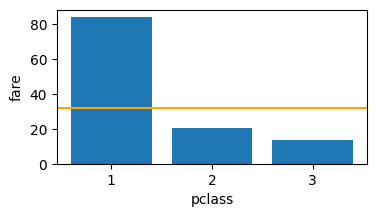

In [381]:
plt.figure(figsize=(4,2))
plt.bar(x=tmp.pclass.astype(str),height=tmp.fare)
plt.axhline(df.fare.mean(),color="orange")
plt.xlabel("pclass")
plt.ylabel("fare")

* 시각화 2

In [382]:
tmp2 = df.groupby("sex",as_index=False)["survived"].mean()

Text(0, 0.5, 'fare')

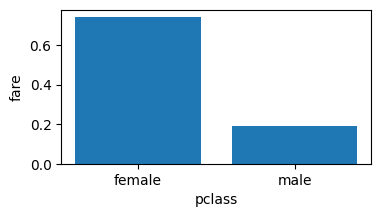

In [383]:
plt.figure(figsize=(4,2))
plt.bar(x=tmp2.sex,height=tmp2.survived)
plt.xlabel("pclass")
plt.ylabel("fare")

***

# 데이터 전처리

## import 및 data load

In [384]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
import numpy as np
import pandas as pd
import seaborn as sns

In [385]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips(2).csv'

In [386]:
df = pd.read_csv(path)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_bill_amount  244 non-null    float64
 1   tip                244 non-null    float64
 2   male_female        244 non-null    object 
 3   smoke_yes_no       244 non-null    object 
 4   week_name          244 non-null    object 
 5   dinner_lunch       244 non-null    object 
 6   size               244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## 컬럼 이름 변경 1. rename

In [388]:
df.rename(columns = {"total_bill_amount" : "total_bill",
            "male_female" : "sex",
            "smoke_yes_no" : "smoker",
            "week_name": "day",
             "dinner_lunch" : "time"},inplace=True) 

In [389]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 컬럼 이름 변경 2. list

In [390]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips(2).csv'
df = pd.read_csv(path)

In [391]:
df.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [392]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 컬럼 추가 1. `df.eval`

In [393]:
df = df.eval("f_amt = total_bill + tip")
df.head()

,total_bill,tip,sex,smoker,day,time,size,f_amt
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20


## 컬럼추가 2. `df["f_amt"]`

In [394]:
df["f_amt"] = df.total_bill + df.tip

In [395]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,f_amt
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20


## 컬럼추가 3. insert()

In [396]:
df.insert(1,"div_tb",df["total_bill"]/df["size"] )

In [397]:
df.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,f_amt
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4,28.20


`-` day변수를 이용하여 휴일 변수 `holiday`열을 만들기

In [398]:
df.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [399]:
df["holiday"]=[1 if "S" in i  else 0 for i in df.day]

In [400]:
df.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,f_amt,holiday
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2,18.00,1
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3,12.00,1
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3,24.51,1
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2,26.99,1
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4,28.20,1


***

#

## 컬럼 삭제

`-` 단일 열 삭제

In [401]:
df.drop("tip",axis=1).head()

,total_bill,div_tb,sex,smoker,day,time,size,f_amt,holiday
0,16.99,8.495000,Female,No,Sun,Dinner,2,18.00,1
1,10.34,3.446667,Male,No,Sun,Dinner,3,12.00,1
2,21.01,7.003333,Male,No,Sun,Dinner,3,24.51,1
3,23.68,11.840000,Male,No,Sun,Dinner,2,26.99,1
4,24.59,6.147500,Female,No,Sun,Dinner,4,28.20,1


In [402]:
df.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,f_amt,holiday
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2,18.00,1
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3,12.00,1
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3,24.51,1
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2,26.99,1
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4,28.20,1


`-` 다중 열 삭제

In [403]:
df.drop(["tip","sex"],axis=1).head()

,total_bill,div_tb,smoker,day,time,size,f_amt,holiday
0,16.99,8.495000,No,Sun,Dinner,2,18.00,1
1,10.34,3.446667,No,Sun,Dinner,3,12.00,1
2,21.01,7.003333,No,Sun,Dinner,3,24.51,1
3,23.68,11.840000,No,Sun,Dinner,2,26.99,1
4,24.59,6.147500,No,Sun,Dinner,4,28.20,1


***

## 범주값 변경

### 1. map

`-` 남자는 1, 여자는 0으로 인코딩

In [404]:
df["sex"] = df["sex"].map({"Male":0,"Female":1})

In [405]:
df.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,f_amt,holiday
0,16.99,8.495000,1.01,1,No,Sun,Dinner,2,18.00,1
1,10.34,3.446667,1.66,0,No,Sun,Dinner,3,12.00,1
2,21.01,7.003333,3.50,0,No,Sun,Dinner,3,24.51,1
3,23.68,11.840000,3.31,0,No,Sun,Dinner,2,26.99,1
4,24.59,6.147500,3.61,1,No,Sun,Dinner,4,28.20,1


### 2. replace

In [406]:
df.sex = df.sex.replace([0,1],["Male","Female"])

In [407]:
_df = df

In [408]:
_df.sex = df.sex.replace({"Male":0,"Female":1})

In [409]:
_df.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,f_amt,holiday
0,16.99,8.495000,1.01,1,No,Sun,Dinner,2,18.00,1
1,10.34,3.446667,1.66,0,No,Sun,Dinner,3,12.00,1
2,21.01,7.003333,3.50,0,No,Sun,Dinner,3,24.51,1
3,23.68,11.840000,3.31,0,No,Sun,Dinner,2,26.99,1
4,24.59,6.147500,3.61,1,No,Sun,Dinner,4,28.20,1


In [410]:
df.time = df.time.replace(["Dinner","Lunch"],[0,1])

In [411]:
df.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,f_amt,holiday
0,16.99,8.495000,1.01,1,No,Sun,0,2,18.00,1
1,10.34,3.446667,1.66,0,No,Sun,0,3,12.00,1
2,21.01,7.003333,3.50,0,No,Sun,0,3,24.51,1
3,23.68,11.840000,3.31,0,No,Sun,0,2,26.99,1
4,24.59,6.147500,3.61,1,No,Sun,0,4,28.20,1


In [412]:
df.smoker = df.smoker.replace(["No","Yes"],[0,1])

In [413]:
df.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,f_amt,holiday
0,16.99,8.495000,1.01,1,0,Sun,0,2,18.00,1
1,10.34,3.446667,1.66,0,0,Sun,0,3,12.00,1
2,21.01,7.003333,3.50,0,0,Sun,0,3,24.51,1
3,23.68,11.840000,3.31,0,0,Sun,0,2,26.99,1
4,24.59,6.147500,3.61,1,0,Sun,0,4,28.20,1


***

## 범주값 만들기

### 1. cut

`-` **크기(그룹의 수)** 를 기준으로 구간을 나눈다.

In [414]:
label = list("ABCD")

In [415]:
_df["g1"] = pd.cut(df["tip"],4,labels = label)

In [416]:
_df["g1"].value_counts()

g1
A    163
B     69
C     10
D      2
Name: count, dtype: int64

`-` 결과가 좀 그렇다.....

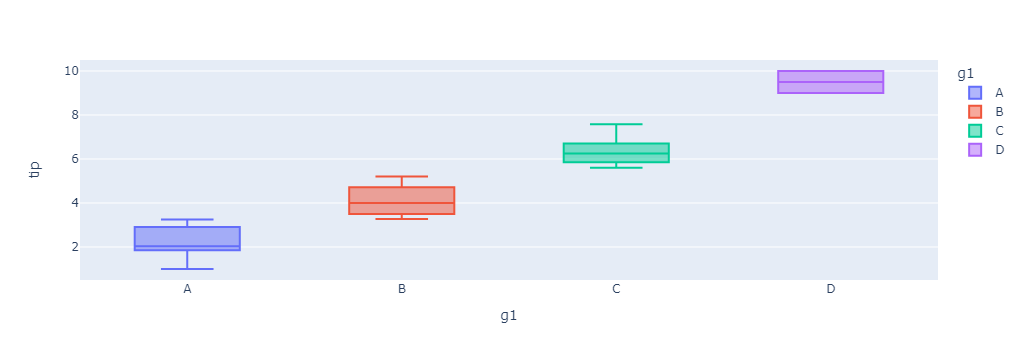

In [417]:
_df.boxplot(backend="plotly",y="tip",x="g1",color="g1")

### 2. qcut

`-` 간격(bins)외 lables을 건네줘서 구체적으로 나눈다. $\to$ 항상, 간격 = labels + 1

#### 예비학습 (qcut x) 

|그룹|구간|
|:---:|:---:|
|A|  $x \leq$ 3 |
|B|3 <  $x \leq$ 6 |
|C| 6 < $x$  |

In [418]:
test = pd.DataFrame(np.arange(0,10),columns=["num"])

In [419]:
lable = list("ABC")

In [420]:
bin = [-np.Inf,3,6,np.Inf]

In [421]:
pd.DataFrame(np.arange(0,10)).shape

(10, 1)

In [422]:
test["g"]= pd.cut(np.arange(0,10),bins = bin,labels = lable)

In [423]:
test

,num,g
0,0,A
1,1,A
2,2,A
3,3,A
4,4,B
5,5,B
6,6,B
7,7,C
8,8,C
9,9,C


#### 실습 qcut (o)

In [424]:
_df["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [425]:
A = [-np.Inf, 2.0, 2.9, 3.5625, np.Inf]

In [426]:
labels = list("ABCD")

In [427]:
_df["g2"]= pd.cut(_df["tip"], bins=A,labels=labels)

In [428]:
_df["g3"] = pd.qcut(_df["tip"],4)

`-` **4분위수로 값을 나누어도 개수가 다른 이유는 값이 같은 것들이 존재하기 때문이다..**

In [429]:
_df["g3"].value_counts()

g3
(0.999, 2.0]     78
(2.9, 3.562]     61
(3.562, 10.0]    61
(2.0, 2.9]       44
Name: count, dtype: int64

In [430]:
_df.g2.value_counts()

g2
A    78
C    61
D    61
B    44
Name: count, dtype: int64

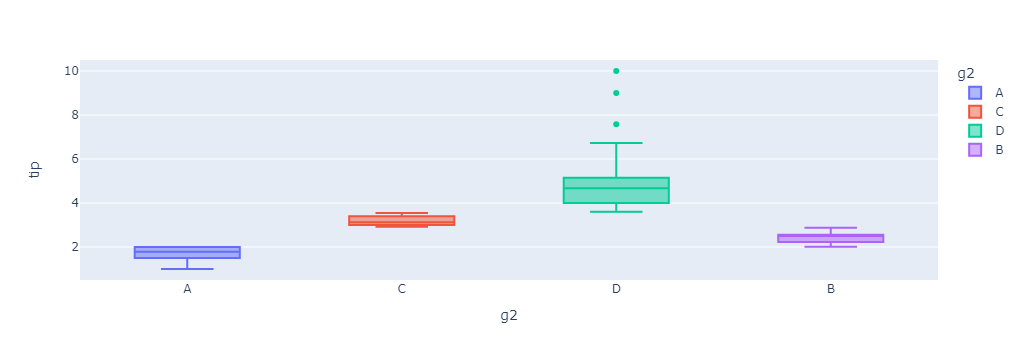

In [431]:
_df.boxplot(backend="plotly",y="tip",x="g2",color="g2")

* `total_bill` 변수의 4분위수를 저장

In [432]:
q1 = df.total_bill.describe()["25%"]
q2 = df.total_bill.describe()["50%"]
q3 = df.total_bill.describe()["75%"]

In [433]:
q1,q2,q3

(13.3475, 17.795, 24.127499999999998)

In [434]:
df["t_g1"] = pd.cut(df["total_bill"], bins = [-np.Inf,q1,q2,q3,np.Inf],labels = list("ABCD"))

In [435]:
df.t_g1.value_counts()

t_g1
A    61
B    61
C    61
D    61
Name: count, dtype: int64

In [436]:
_df.t_g1.value_counts()

t_g1
A    61
B    61
C    61
D    61
Name: count, dtype: int64

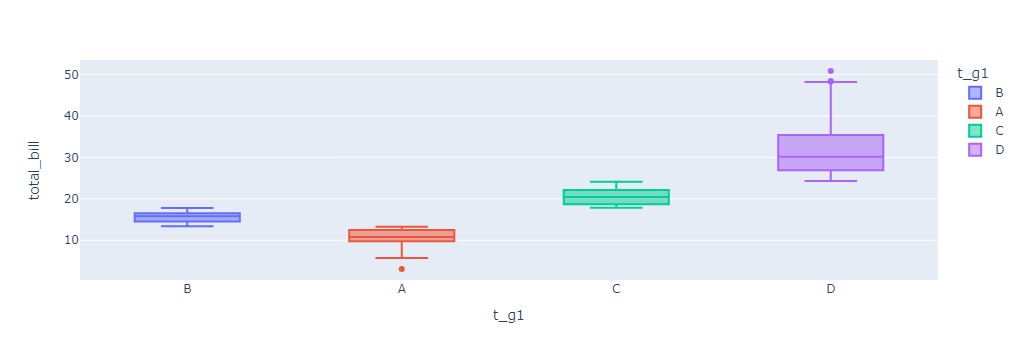

In [437]:
_df.boxplot(backend="plotly",y="total_bill",x="t_g1",color="t_g1")

***

## 결측치 처리

### data load

[airquality 데이터 셋 정보]

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Month: 월
- Day: 일

In [438]:
# | code-fold : true
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'
df = pd.read_csv(path)

# 확인
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### 결측치 확인법($\star\star$)

`-` 확인 1. `df.into()` : `Ozone, Solar.R`에서 결측치가 있는 것으로 보인다.

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


`-` 확인 2. `df.isna()==df.isnull()`

In [440]:
#df.isna()
df.isnull().head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,True,True,False,False,False,False


In [441]:
df.notnull().head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,False,False,True,True,True,True


`-` 방법 3 : `df.isna().sum()`

In [442]:
df.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

`-` 결측치 비율 구하기

In [443]:
df.isna().sum() / len(df)

Ozone      0.241830
Solar.R    0.045752
Wind       0.000000
Temp       0.000000
Month      0.000000
Day        0.000000
dtype: float64

### 결측치 제거

* `axis=1`로 하면 열이 통째로 날아가지 지양하자

In [444]:
_df=df.dropna(axis=0).reset_index(drop=True)

In [445]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
 4   Month    111 non-null    int64  
 5   Day      111 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 5.3 KB


`-` 제거된 행 확인

In [446]:
len(df)-len(_df)

42

### 특정 열에 결측치가 있는 행 제거

In [447]:
_df = df.copy()

In [448]:
_df.dropna(subset = ["Ozone"],axis=0,inplace=True)

In [449]:
len(df) - len(_df)

37

In [450]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     116 non-null    float64
 3   Temp     116 non-null    int64  
 4   Month    116 non-null    int64  
 5   Day      116 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 6.3 KB


In [451]:
_df.isna().sum()

Ozone      0
Solar.R    5
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

### 결측치 채우기

`-` 평균값으로 채우기 

In [452]:
_df = df.copy()

In [453]:
mo = _df.Ozone.mean()

In [454]:
_df["Ozone"].fillna(mo,inplace=True)

In [455]:
_df.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

`-` 특정값으로 채우기 : `Solar.R==na $\to$ 0`

In [456]:
_df["Solar.R"].fillna(0,inplace=True)

In [457]:
_df.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

`-` 직전 행 또는 바로 다음 행의 값으로 채우기

* 해당 데이터는 시계열 데이터 이므로 직전이나, 다음 행의 값으로 결측치를 대체해도 될 것 같다.

In [458]:
_df = df.copy()

`-` 직전값으로 채우기 $\to$ fillna(,method="ffill")

In [459]:
_df.Ozone.fillna(method="ffill",inplace=True)

In [460]:
_df.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

`-` 다음값으로 채우기 $\to$ fillna(, method = "bfill")

In [461]:
_df["Solar.R"].fillna(method = "bfill",inplace=True)

In [462]:
_df.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

`-` 선형보간법으로 채우기 $\to$ `interpolate()`

`-` 다음과 같이 결측치를 선형방식으로 채운다. **(빨간색점!)**

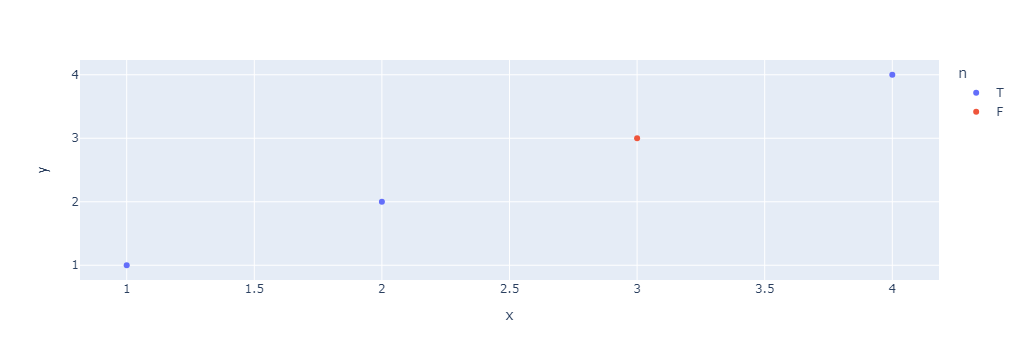

In [463]:
# | code-fold : true
x = [1,2,3,4]
y = [1,2,3,4]
n = ["T","T","F","T"]
a = pd.DataFrame([x,y,n]).T
a.columns=list("xyn")

a.plot(kind= "scatter",x="x",y="y",color="n",backend="plotly")

In [465]:
_df = df.copy()
_df["Ozone"].interpolate(method="linear",inplace=True)
_df["Solar.R"].interpolate(method="linear",inplace=True)
_df.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64